# Imports

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Task 1

## Input data

In [85]:
# Distributions
pxy1 = lambda x : 1 / (math.pi * (1 + x**2))  # Cauchy(0, 1)
pxy2 = lambda x : 1 / 3 if 0. <= x <= 3. else 0.  # U(0, 3)

# Loss function scales
l1, l2 = 2, 1

# A priori probs
py1, py2 = 0.4, 0.6

In [121]:
def plot(d1, d2, legend = []):
    plt.figure(figsize=(8, 6))

    # Setup distributions
    x = np.linspace(-5, 5, 201)
    dist1 = d1(x)
    dist2 = np.vectorize(d2)(x)

    # Plot first distribution
    plt.plot(x, dist1, 'b')

    # Plot second distribution
    k = 0
    for i in range(1, len(x)):
        if not math.isclose(dist2[i], dist2[i - 1]):
            # Plot connected segments
            plt.plot(x[k : i], dist2[k : i], 'r-')

            # Plot jump
            plt.plot(x[i - 1 : i + 1], dist2[i - 1 : i + 1], 'r--')

            # Update starting index
            k = i

    # Plot last segments
    plt.plot(x[k:], dist2[k:], 'r-')

    # Show legend
    if len(legend) > 0:
        plt.legend(legend, fontsize='large')

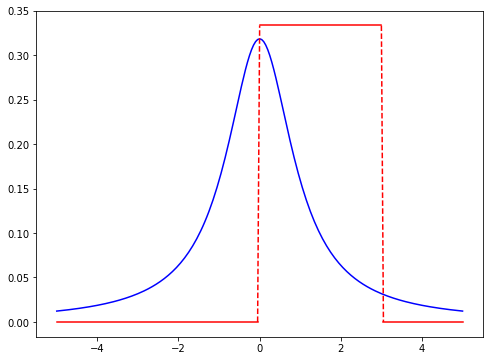

In [122]:
# Initial distributions
plot(pxy1, pxy2)

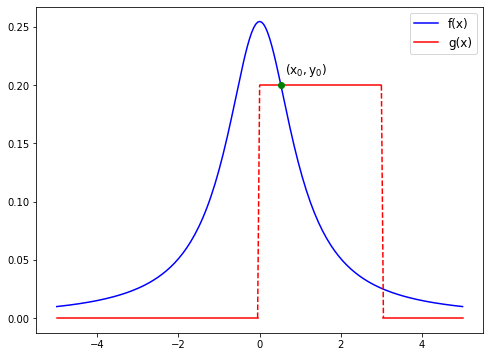

In [128]:
# Scaled distributions
f = lambda x : l1 * py1 * pxy1(x)
g = lambda x : l2 * py2 * pxy2(x)
plot(f, g, ['f(x)', 'g(x)'])

# Plot intersection point
x = math.sqrt(4 / math.pi - 1)
y = f(x)
plt.plot(x, y, 'go')

# Plot label
plt.text(x + 0.1, y + 0.01, '$\mathregular{(x_0, y_0)}$', fontsize='large')

plt.savefig("tex/materials/distribs.pdf")

## 1. Find an optimal Bayes classifier

In [9]:
def a1(x):
    return 1 if math.sqrt(4 / math.pi - 1) <= x <= 3 else -1

## 2. Evaluate a mean risk

In [ ]:
def R():
    pass